<font size="+3" color="#000000"><b>Census Income Prediction</b></font>

<div style="text-align: center;">
    <img src="https://i.ytimg.com/vi/H7rEZWF4pkc/sddefault.jpg" alt="Flight Price Prediction" width="750px" />
</div>


<font color="#FF8C00"><h2>Funtions for Graphs</font>

In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, OneHotEncoder, OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
file_name = input("Enter the CSV file name: ")
df = basicProjectInfo(file_name)
df

Enter the CSV file name: adult.csv


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
checkNull(df)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#To rename columns
df = custom_rename(df)
df

Enter the existing column name (press Enter to finish): native.country
Enter the new column name: native_country
Enter the existing column name (press Enter to finish): capital.loss
Enter the new column name: capital_loss
Enter the existing column name (press Enter to finish): 


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
# To repalce any value in the dataFrame
to_replace = input("Enter the value to be replace: ")
value = input("Enter the new value  ")
df = custom_replace(df, to_replace, value)
df

Enter the value to be replace: ?
Enter the new value  nan


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
checkNull(df)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [ ]:
#To fill null values
#uncomment if you want to fill null values
#df = custom_fillna(df)
#df

In [ ]:
# Drop columns
columns_to_drop = input("Enter columns to drop (comma-separated): ").split(',')
df = dropColumns(df, columns_to_drop)
print("\nDataFrame after dropping columns:")
df


Enter columns to drop (comma-separated): fnlwgt

DataFrame after dropping columns:


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Drop null values
df = dropNull(df)
df


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
checkNull(df)

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
info(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education_num   30162 non-null  int64 
 4   marital_status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital_gain    30162 non-null  int64 
 10  capital_loss    30162 non-null  int64 
 11  hours_per_week  30162 non-null  int64 
 12  native_country  30162 non-null  object
 13  income          30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
# Category change
#uncomment if you want to change dtype
#column_map = {'DateColumn': 'date', 'CategoryColumn': 'category'}
#df = categoryChange(df, column_map)
#print("\nDataFrame after category change:")
#print(df.head())


In [ ]:
# Add columns
#uncomment if you want to add columns
#addColumns(df, new_column_name))
#df.head()

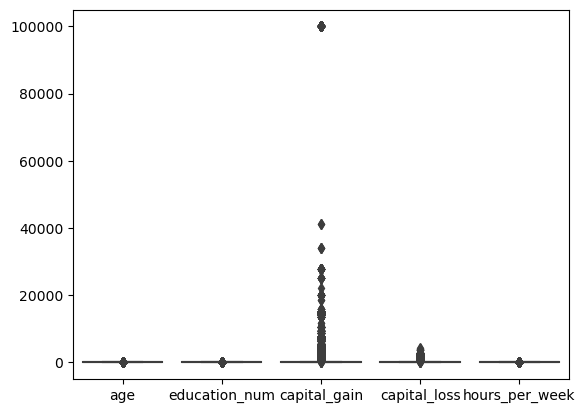

In [ ]:
# Outlier detection and removal
outlierDtection(df)

In [ ]:
#uncommnent if you want to drop outliers
#columns = input("Enter columns to treat (comma-separated): ").split(',')
#method = input("Enter how to treat outlier drop/cap: ")
#df = outlierRemoval(df, method, columns)
#df

In [ ]:
# Outlier detection and removal
#outlierDtection(df)

Filtering


In [ ]:
#  How many people are working as tech support and have an annual income greater than 50k
result_df = apply_user_conditions(df)
result_df

Enter column name: occupation
Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): ==
Enter value: Tech-support
Do you want to apply more conditions? (yes/no): yes
Enter logical operator ('and' or 'or'): and
Enter column name: income
Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): ==
Enter value: >50K
Do you want to apply more conditions? (yes/no): no


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
52,51,State-gov,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Male,0,2444,39,United-States,>50K
182,44,Federal-gov,Bachelors,13,Divorced,Tech-support,Not-in-family,White,Male,0,2258,40,United-States,>50K
349,40,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,60,United-States,>50K
365,48,Private,Prof-school,15,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,40,United-States,>50K
408,55,Private,Masters,14,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,20,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31633,42,Private,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
31761,25,Private,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,60,United-States,>50K
31898,51,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K
32134,59,Federal-gov,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
# How many people are having private work classes and are not from the United States of America
result_df = apply_user_conditions(df)
result_df

Enter column name: workclass
Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): ==
Enter value: Private
Do you want to apply more conditions? (yes/no): yes
Enter logical operator ('and' or 'or'): and
Enter column name: native_country
Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): !=
Enter value: United-States
Do you want to apply more conditions? (yes/no): no


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
26,33,Private,1st-4th,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,0,2603,32,Mexico,<=50K
27,49,Private,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,Male,0,2603,40,Greece,<=50K
82,31,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2415,70,Taiwan,>50K
90,39,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,67,India,>50K
95,46,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,2415,35,Philippines,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32468,85,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32513,45,Private,10th,6,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,<=50K
32536,54,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32549,43,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K


In [ ]:
#How many people are either having Income less than or equal to 50k
#and their working hours is greater than or equal to 40 hrs:
result_df = apply_user_conditions(df)
result_df

Enter column name: income
Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): ==
Enter value: <=50K
Do you want to apply more conditions? (yes/no): yes
Enter logical operator ('and' or 'or'): and
Enter column name: hours_per_week
Enter operator (e.g., '==', '!=', '>', '<', '>=', '<='): >=
Enter value: 40
Do you want to apply more conditions? (yes/no): no


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
8,68,Federal-gov,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,43,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
# Apply user-defined grouping
result_df = grouping(df)
result_df

Choose a plot type:
1. Bar Plot
2. Pie Plot
3. Count Plot
4. KDE Plot
5. Scatter Plot
6. Regression Plot
7. Heatmap
8. Box Plot
9. Relational Plot
Enter the number corresponding to your choice: 3
Enter the x-axis label: Income Groups
Enter the y-axis label: Count
Enter the plot title: INCOME DISTRIBUTION
Enter the name of the x-axis variable: income
Enter the name of the hue variable (optional, press Enter to skip): sex


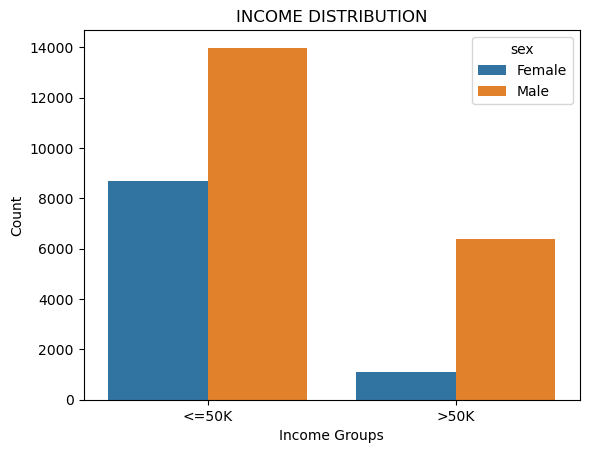

In [ ]:
# Visualization
choose_plot()

Choose a plot type:
1. Bar Plot
2. Pie Plot
3. Count Plot
4. KDE Plot
5. Scatter Plot
6. Regression Plot
7. Heatmap
8. Box Plot
9. Relational Plot
Enter the number corresponding to your choice: 2
Enter the name of the values variable: workclass


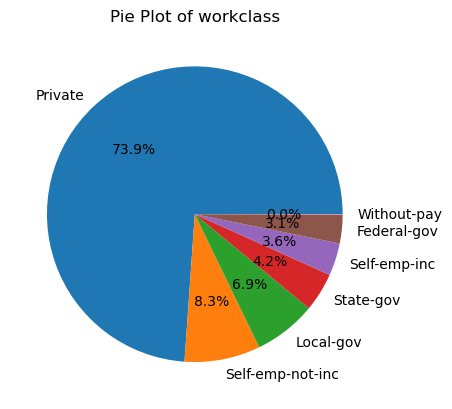

In [ ]:
choose_plot()

Choose a plot type:
1. Bar Plot
2. Pie Plot
3. Count Plot
4. KDE Plot
5. Scatter Plot
6. Regression Plot
7. Heatmap
8. Box Plot
9. Relational Plot
Enter the number corresponding to your choice: 3
Enter the x-axis label: WORKCLASS
Enter the y-axis label: COUNT
Enter the plot title: INCOME DISTRIBUTION AS PER CLASS
Enter the name of the x-axis variable: workclass
Enter the name of the hue variable (optional, press Enter to skip): income


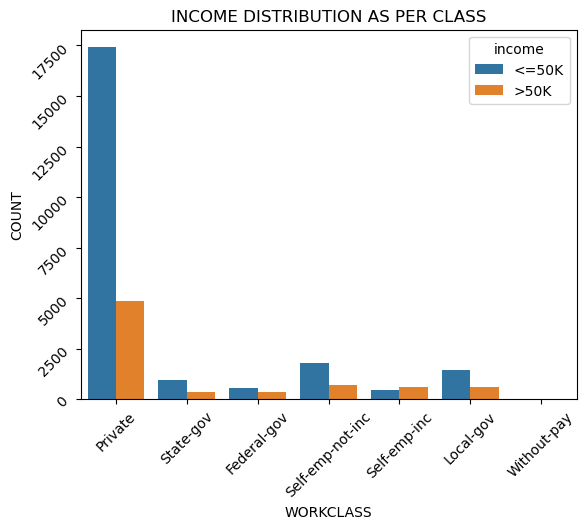

In [ ]:
choose_plot()

Choose a plot type:
1. Bar Plot
2. Pie Plot
3. Count Plot
4. KDE Plot
5. Scatter Plot
6. Regression Plot
7. Heatmap
8. Box Plot
9. Relational Plot
Enter the number corresponding to your choice: 7
Enter the x-axis label: COLUMNS
Enter the y-axis label: COLUMNS
Enter the plot title: HEATMAP


C:\Users\anike\AppData\Local\Temp\ipykernel_20824\182725945.py:61: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


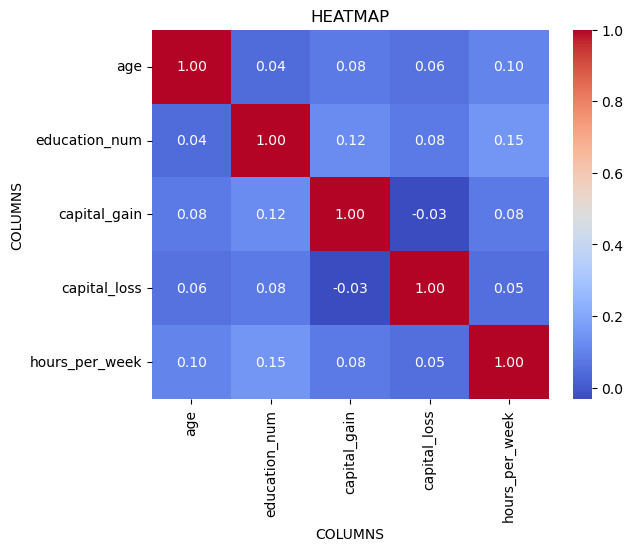

In [ ]:
choose_plot()

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = custom_train_test_split(df)

Enter the target variable column name: income
Enter the test size (as a decimal between 0.0 and 1.0): 0.2
Enter the random state (optional, press Enter to use default 10): 15


In [ ]:
X_train

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
19146,31,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,38,United-States
16691,43,Private,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
25313,29,State-gov,HS-grad,9,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,40,Thailand
23095,23,Private,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States
21013,53,Private,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17511,41,Private,HS-grad,9,Never-married,Sales,Unmarried,Black,Female,0,0,40,United-States
2853,34,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7298,0,40,United-States
8721,40,State-gov,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Taiwan
21789,52,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,60,United-States


In [ ]:
#applying transformers on feature varaiables

X_train, X_test = custom_transform(X_train, X_test)

Enter columns to apply Power Transformer (comma-separated, press Enter to skip): age,capital_gain,capital_loss
Enter columns to apply Function Transformer (comma-separated, press Enter to skip): hours_per_week
Enter columns to apply OneHotEncoder (comma-separated, press Enter to skip): workclass,marital_status,occupation,relationship,race,sex,native_country
Enter columns to apply Ordinal Encoder (comma-separated, press Enter to skip): education
Enter columns to apply StandardScaler (comma-separated, press Enter to skip): 


In [ ]:
# applying encoding on target variables
y_train, y_test = custom_encoding(y_train,y_test)

In [ ]:
X_train

array([[-0.48152084, -0.30389745, -0.22299309, ...,  0.        ,
         0.        , 11.        ],
       [ 0.46138498, -0.30389745, -0.22299309, ...,  0.        ,
         0.        , 12.        ],
       [-0.66554012, -0.30389745, -0.22299309, ...,  0.        ,
         0.        , 11.        ],
       ...,
       [ 0.24718379, -0.30389745, -0.22299309, ...,  0.        ,
         0.        , 10.        ],
       [ 1.04029893, -0.30389745, -0.22299309, ...,  0.        ,
         0.        , 11.        ],
       [-1.06535176, -0.30389745, -0.22299309, ...,  0.        ,
         0.        , 15.        ]])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(24129, 80)
(6033, 80)
(24129,)
(6033,)


Select a model:
1. Linear Regression
2. Logistic Regression
3. Decision Tree Regressor
4. Random Forest Regressor
5. k-Nearest Neighbors Regressor
6. Support Vector Machine Regressor
7. XGBoost Regressor
8. Decision Tree Classifier
9. Random Forest Classifier
10. Naive Bayes
Enter the number corresponding to your choice: 2
Is this a classification problem? (yes/no): yes


C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score      support
0              0.875426  0.902723  0.888865  4554.000000
1              0.668661  0.604462  0.634943  1479.000000
accuracy       0.829604  0.829604  0.829604     0.829604
macro avg      0.772044  0.753593  0.761904  6033.000000
weighted avg   0.824737  0.829604  0.826616  6033.000000


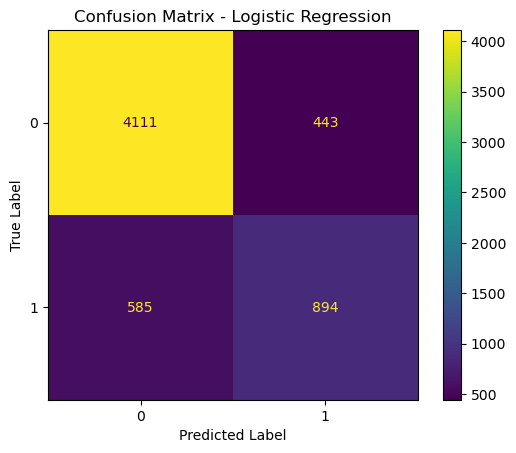

,0,1,macro avg,weighted avg,accuracy,Model
0,NaN,NaN,NaN,NaN,0.829604,Logistic Regression


In [ ]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df

Select a model:
1. Linear Regression
2. Logistic Regression
3. Decision Tree Regressor
4. Random Forest Regressor
5. k-Nearest Neighbors Regressor
6. Support Vector Machine Regressor
7. XGBoost Regressor
8. Decision Tree Classifier
9. Random Forest Classifier
10. Naive Bayes
Enter the number corresponding to your choice: 8
Enter max depths (comma-separated): 3,4,5,10,15
Is this a classification problem? (yes/no): yes
              precision    recall  f1-score      support
0              0.865611  0.936320  0.899578  4554.000000
1              0.738031  0.552400  0.631864  1479.000000
accuracy       0.842201  0.842201  0.842201     0.842201
macro avg      0.801821  0.744360  0.765721  6033.000000
weighted avg   0.834335  0.842201  0.833947  6033.000000


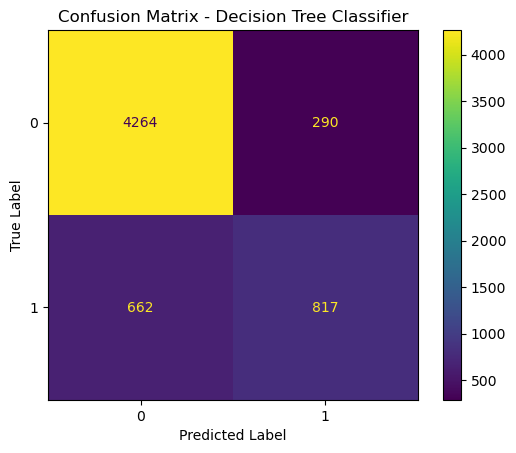

,0,1,macro avg,weighted avg,accuracy,Model
0,NaN,NaN,NaN,NaN,0.842201,Decision Tree Classifier


In [ ]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df


Select a model:
1. Linear Regression
2. Logistic Regression
3. Decision Tree Regressor
4. Random Forest Regressor
5. k-Nearest Neighbors Regressor
6. Support Vector Machine Regressor
7. XGBoost Regressor
8. Decision Tree Classifier
9. Random Forest Classifier
10. Naive Bayes
Enter the number corresponding to your choice: 9
Enter max depths (comma-separated): 3,4,5,10,15
Is this a classification problem? (yes/no): yes
              precision    recall  f1-score      support
0              0.869117  0.944884  0.905418  4554.000000
1              0.768022  0.561866  0.648965  1479.000000
accuracy       0.850986  0.850986  0.850986     0.850986
macro avg      0.818570  0.753375  0.777192  6033.000000
weighted avg   0.844334  0.850986  0.842548  6033.000000


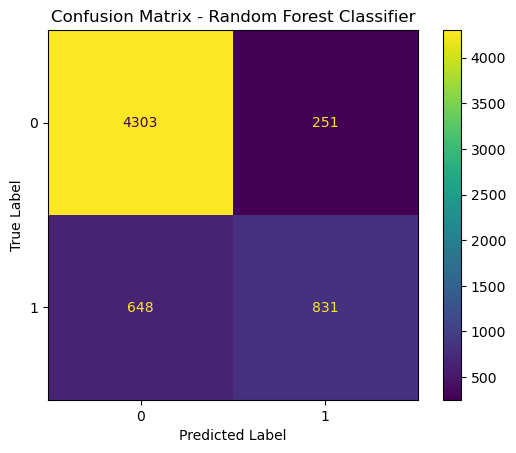

,0,1,macro avg,weighted avg,accuracy,Model
0,NaN,NaN,NaN,NaN,0.850986,Random Forest Classifier


In [ ]:
model_choice = select_model()
result_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, model_choice)
result_df
